<a href="https://colab.research.google.com/github/zir0j/data-analytics/blob/main/Carbon_Emmisions_throughout_the_Decades.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing the Data and setting the questions**

Using [Carbon Major's dataset of medium granuality](https://carbonmajors.org/evoke/391/get_cm_file?type=Basic&file=emissions_medium_granularity.csv), we'll answer the following questions:


1.   What is the progression of carbon emissions (CO2) throughout the years in terms of:

*   Entity type
*   Commodities

2.   What are the total CO2 emmissions produced by each commodity?
3.   Who are the top 10 entities with the most CO2 emmissions throughout the time period that the dataset was established?



In [154]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [155]:
#Print the data

df = pd.read_csv('emissions_medium_granularity.csv')
df.head()

,year,parent_entity,parent_type,commodity,production_value,production_unit,total_emissions_MtCO2e
0,1962,Abu Dhabi National Oil Company,State-owned Entity,Oil & NGL,0.91250,Million bbl/yr,0.363885
1,1962,Abu Dhabi National Oil Company,State-owned Entity,Natural Gas,1.84325,Bcf/yr,0.134355
2,1963,Abu Dhabi National Oil Company,State-owned Entity,Oil & NGL,1.82500,Million bbl/yr,0.727770
3,1963,Abu Dhabi National Oil Company,State-owned Entity,Natural Gas,4.42380,Bcf/yr,0.322453
4,1964,Abu Dhabi National Oil Company,State-owned Entity,Oil & NGL,7.30000,Million bbl/yr,2.911079


# **Time Series Analysis**

Based on the two graphs below, we can see that the rise for CO2 emissions started around the 1900s. Such emissions are a result of the [industrial revolution](https://education.nationalgeographic.org/resource/industrialization-labor-and-life/), wherein machinery is slowly being integrated in the workforce to achieve efficiency. While the revolution welcomed changes in the workplace, ecological damage followed suit.

Figure 1 shows the progression of each entity type (`[parent-type]` in the dataset) and their production of CO2 emissions. Towards this decade, Nation States had an uptick in their production, surpassing state-owned entities. With this, it can be said that state-owned enterprises have produced more than investor-owned.

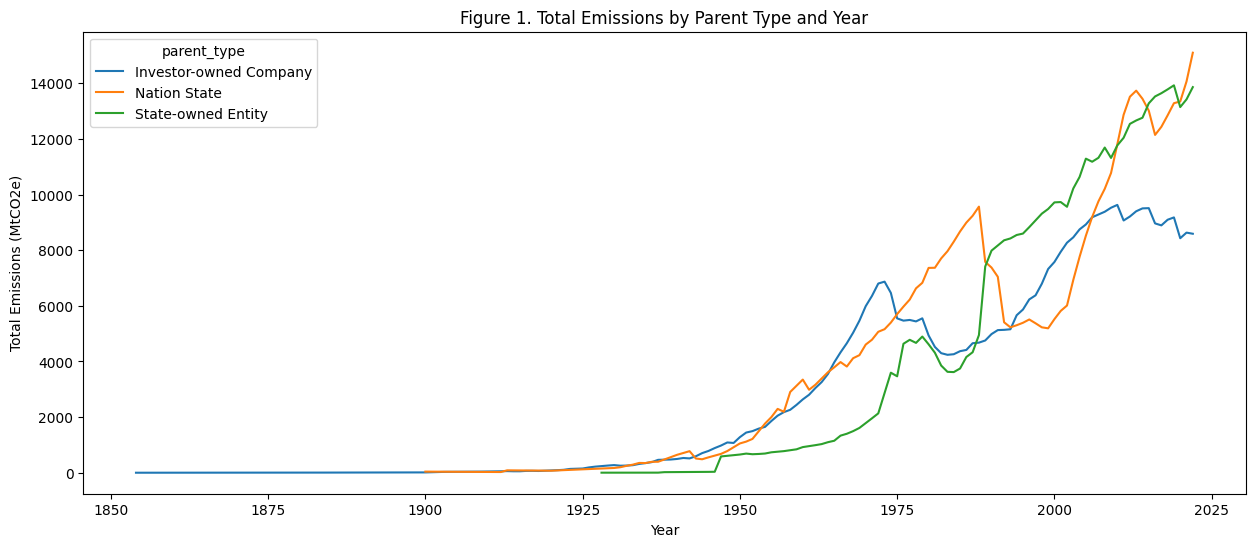

In [161]:
# Time Series Analysis of progression of CO2 emmision per entity type

#Group the data by Year and Parent-type
df_grouped_1 = df.groupby(['year', 'parent_type'])['total_emissions_MtCO2e'].sum().unstack()

#Plot the data
df_grouped_1.plot(kind='line', figsize=(15, 6))
plt.title('Figure 1. Total Emissions by Parent Type and Year')
plt.xlabel('Year')
plt.ylabel('Total Emissions (MtCO2e)')
plt.show()


Based from Figure 2, prevalent commodity — till this decade — are Oil & Natural Gas Liquids (NGL), Bituminous Coal, and Natural Gas. Later, we shall discuss factors as to how this may came to be.

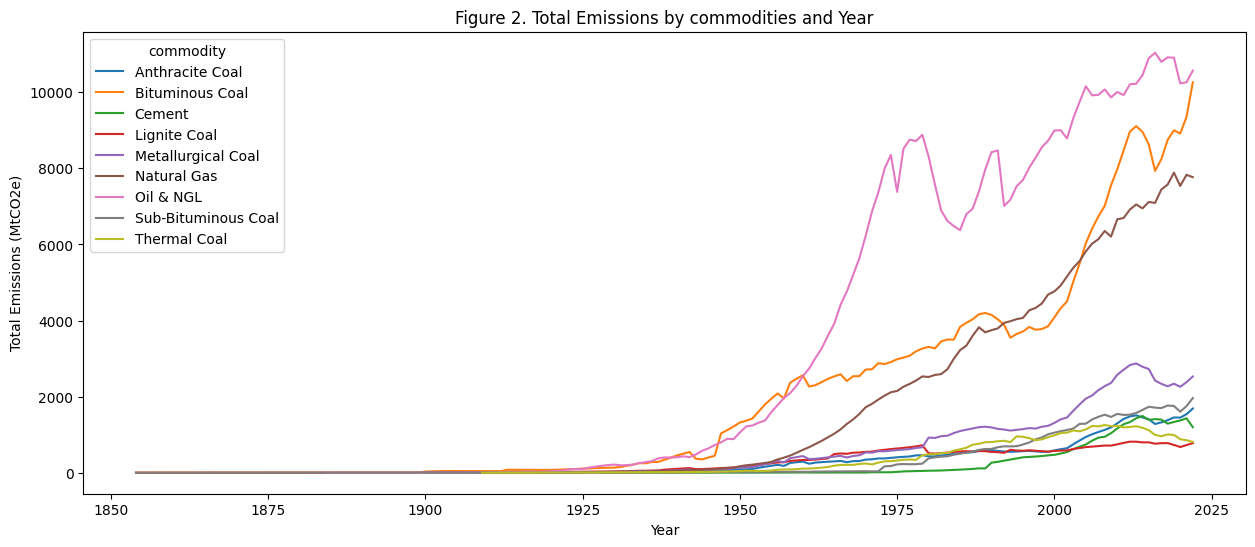

In [162]:
# Time Series Analysis of progression of CO2 emmision per commodity type

#Group the data by Year and Commodities
df_grouped_2 = df.groupby(['year', 'commodity'])['total_emissions_MtCO2e'].sum().unstack()

#Plot the data
df_grouped_2.plot(kind='line', figsize=(15, 6))
plt.title('Figure 2. Total Emissions by commodities and Year')
plt.xlabel('Year')
plt.ylabel('Total Emissions (MtCO2e)')
plt.show()

In [158]:
#Group the data by Commodity
df_commodities = df.groupby(['commodity'])['total_emissions_MtCO2e'].sum().round(2).sort_values(ascending=False)
df_commodities


commodity
Oil & NGL              527968.65
Bituminous Coal        330765.39
Natural Gas            259155.01
Metallurgical Coal      87560.21
Sub-Bituminous Coal     49794.04
Anthracite Coal         47496.21
Thermal Coal            45733.58
Lignite Coal            42691.55
Cement                  29681.98
Name: total_emissions_MtCO2e, dtype: float64

# **Entities with most CO2 emissions**

Based on the historical dataset, China's coal industry has produced approximately 276,458.02 metric tons of Co2 (MtCO2e), contributing to the rise of Bituminous Coal in this current decade. Oil companies such as Chevron, ExxonMobil, and Shell have also been cited as part of the Top 10 for most CO2 emisions, which could be one of the factors for the constant increase of Oil & NGL production.

In [160]:
#Group the data by Entity and Parent-type and display the Top 10 entities with the most CO2 emissions
df_entities = df.groupby(['parent_entity', 'parent_type'])['total_emissions_MtCO2e'].sum().round(2).sort_values(ascending=False).head(10)
df_entities

parent_entity             parent_type           
China (Coal)              Nation State              276458.02
Former Soviet Union       Nation State              135112.67
Saudi Aramco              State-owned Entity         68831.54
Chevron                   Investor-owned Company     57897.85
ExxonMobil                Investor-owned Company     55105.10
Gazprom                   State-owned Entity         50686.97
National Iranian Oil Co.  State-owned Entity         43111.69
BP                        Investor-owned Company     42530.42
Shell                     Investor-owned Company     40674.06
Coal India                State-owned Entity         29391.30
Name: total_emissions_MtCO2e, dtype: float64